In [1]:
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation 
import copy

sys.path.append("../XRaySimulation/")

from XRaySimulation import util, Pulse, Crystal, MultiDevice

In [2]:
def get_crystals_in_delayed_branch(asymmetric_angles=np.array([0, -5, 5, 0, 0, 5, -5, 0]),
                                   lattice_distance=1.9201 * 1e-4,
                                   chi_dict=None):
    ###########################################################################
    #              Define  physical properties
    ###########################################################################
    # Some meta data for the delay line.
    h_length = 2. * np.pi / lattice_distance

    ###########################################################################
    #              Define crystal arrays
    ###########################################################################
    thetas = np.array([np.pi / 2,
                       - np.pi / 2,
                       - np.pi / 2,
                       np.pi / 2,
                       np.pi / 2,
                       - np.pi / 2,
                       - np.pi / 2,
                       np.pi / 2])

    rhos = thetas + np.pi
    for x in range(8):
        rhos[x] += asymmetric_angles[x]

    crystal_list = [Crystal.CrystalBlock3D(h=h_length * np.array([0., 
                                                                  np.sin(thetas[x]), 
                                                                  np.cos(thetas[x])], dtype=np.float64),
                                           normal=np.array([0.,
                                                            np.sin(rhos[x]),
                                                            np.cos(rhos[x])]),
                                           surface_point=np.zeros(3, dtype=np.float64),
                                           thickness=106,
                                           chi_dict=chi_dict)
                    for x in range(8)]

    # ----------------------------------------------------------------------
    #          Crystal 1
    # ----------------------------------------------------------------------
    boundary = np.array([[0, 10, 39.052],
                         [50, 10, 39.052],
                         [50, 0, 39.052],
                         [0, 0, 39.052]]) * 1000

    crystal_list[0].boundary = boundary[:, [2, 1, 0]]
    crystal_list[0].set_surface_point(crystal_list[0].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 2
    # ----------------------------------------------------------------------
    boundary = np.array([[25.070, 26.440, 39.052],
                         [90.070, 20.753, 39.052],
                         [90.070, 36.440, 39.052],
                         [25.070, 36.440, 39.052]]) * 1000

    crystal_list[1].boundary = boundary[:, [2, 1, 0]]
    crystal_list[1].set_surface_point(crystal_list[1].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 3
    # ----------------------------------------------------------------------
    boundary = np.copy(crystal_list[1].boundary)
    boundary[:, 2] *= -1

    crystal_list[2].boundary = np.copy(boundary)
    crystal_list[2].set_surface_point(crystal_list[2].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 4
    # ----------------------------------------------------------------------
    boundary = np.copy(crystal_list[0].boundary)
    boundary[:, 2] *= -1

    crystal_list[3].boundary = np.copy(boundary)
    crystal_list[3].set_surface_point(crystal_list[3].boundary[0])
    #######################################################################################################
    #######################################################################################################
    # ----------------------------------------------------------------------
    #          Crystal 5
    # ----------------------------------------------------------------------
    crystal_list[4].boundary = np.copy(crystal_list[3].boundary)
    crystal_list[4].set_surface_point(crystal_list[4].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 7
    # ----------------------------------------------------------------------
    boundary = np.array([[25.070, 26.440, 39.052],
                         [90.070, 20.753, 39.052],
                         [90.070, 30.753, 39.052],
                         [25.070, 36.440, 39.052]]) * 1000

    crystal_list[6].boundary = boundary[:, [2, 1, 0]]
    crystal_list[6].set_surface_point(crystal_list[6].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 6
    # ----------------------------------------------------------------------
    boundary = np.copy(crystal_list[6].boundary)
    boundary[:, 2] *= -1

    crystal_list[5].boundary = np.copy(boundary)
    crystal_list[5].set_surface_point(crystal_list[5].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 8
    # ----------------------------------------------------------------------
    crystal_list[7].boundary = np.copy(crystal_list[0].boundary)
    crystal_list[7].set_surface_point(crystal_list[7].boundary[0])

    return crystal_list


def get_crystal_in_delay_fixed_branch(lattice_distance=1.9201 * 1e-4, chi_dict=None, miscut=None):
    ###########################################################################
    #              Define  physical properties
    ###########################################################################
    # Some meta data for the delay line.
    h_length = 2. * np.pi / lattice_distance

    ###########################################################################
    #              Define crystal arrays
    ###########################################################################
    thetas = np.array([-np.pi / 2,
                       np.pi / 2,
                       np.pi / 2,
                       -np.pi / 2])
    rhos = thetas + np.pi
    if miscut is not None:
        for x in range(4):
            rhos[x] += miscut[x]

    crystals_list = [Crystal.CrystalBlock3D(h=h_length * np.array([0., 
                                                                  np.sin(thetas[x]), 
                                                                  np.cos(thetas[x])], dtype=np.float64),
                                           normal=np.array([0.,
                                                            np.sin(rhos[x]),
                                                            np.cos(rhos[x])]),
                                           surface_point=np.zeros(3, dtype=np.float64),
                                           thickness=106,
                                           chi_dict=chi_dict)
                    for x in range(4)]
    # ----------------------------------------------------------------------
    #          Crystal 1
    # ----------------------------------------------------------------------
    boundary = np.array([[-60, 12.57, 40],
                         [-20, 12.57, 40],
                         [-20, 22.57, 40],
                         [-22.68, 22.57, 40]])
    boundary -= np.array([-60, -22.57, 0])[np.newaxis, :]
    boundary *= 1000

    crystals_list[0].boundary = boundary[:, [2, 1, 0]]
    crystals_list[0].set_surface_point(crystals_list[0].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 2
    # ----------------------------------------------------------------------
    boundary = np.array([[-60, -12.58, 40],
                         [60, -12.58, 40],
                         [60, -22.57, 40],
                         [-60, -22.57, 40]])
    boundary -= np.array([-60, -22.57, 0])[np.newaxis, :]
    boundary *= 1000

    crystals_list[1].boundary = boundary[:, [2, 1, 0]]
    crystals_list[1].set_surface_point(crystals_list[1].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 3
    # ----------------------------------------------------------------------
    boundary = np.array([[-65, -12.90, 40],
                         [65, -12.90, 40],
                         [65, -22.90, 40],
                         [-65, -22.90, 40]])
    boundary -= np.array([-65, -22.90, 0])[np.newaxis, :]
    boundary *= 1000

    crystals_list[2].boundary = boundary[:, [2, 1, 0]]
    crystals_list[2].set_surface_point(crystals_list[2].boundary[0])
    # ----------------------------------------------------------------------
    #          Crystal 4
    # ----------------------------------------------------------------------
    boundary = np.array([[45, 12.90, 40],
                         [65, 12.90, 40],
                         [65, 22.90, 40],
                         [45, 22.90, 40]])
    boundary -= np.array([-65, -22.90, 0])[np.newaxis, :]
    boundary *= 1000

    crystals_list[3].boundary = boundary[:, [2, 1, 0]]
    crystals_list[3].set_surface_point(crystals_list[3].boundary[0])
    return crystals_list


def align_delayed_branch(delayed_branch_crystals, angle_offset, bragg, tweak):
    d1 = tweak[0]
    d2 = tweak[1]
    d3 = tweak[2]
    d4 = tweak[3]

    # ----------------------------------------------------------------------
    #          CC 1
    # ----------------------------------------------------------------------
    displacement = np.array([322.27, 638.69, 253.74]) * 1000
    rot_mat = Rotation.from_euler('x', -bragg + angle_offset + d1)

    delayed_branch_crystals[0].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[0].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)

    delayed_branch_crystals[1].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[1].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)

    # ----------------------------------------------------------------------
    #          CC 2
    # ----------------------------------------------------------------------
    displacement = np.array([551.90, 642.47, 252.67]) * 1000
    rot_mat = Rotation.from_euler('x', bragg + angle_offset + d2)

    delayed_branch_crystals[2].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[2].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)

    delayed_branch_crystals[3].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[3].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)

    # ----------------------------------------------------------------------
    #          CC 3
    # ----------------------------------------------------------------------
    displacement = np.array([671.47, 677.99, 252.66]) * 1000
    rot_mat = Rotation.from_euler('x', bragg + angle_offset + d3 + np.pi)

    delayed_branch_crystals[4].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[4].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)

    delayed_branch_crystals[5].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[5].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)
    # ----------------------------------------------------------------------
    #          Crystal 4
    # ----------------------------------------------------------------------
    displacement = np.array([886.70, 677.98, 252.65]) * 1000
    rot_mat = Rotation.from_euler('x', -bragg + angle_offset + d4 + np.pi)

    delayed_branch_crystals[6].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[6].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)

    delayed_branch_crystals[7].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delayed_branch_crystals[7].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                include_boundary=True)

    return delayed_branch_crystals


def align_delay_fixed_branch(delay_fixed_branch_crystals, angle_offset, bragg, tweak):
    # ----------------------------------------------------------------------
    #          CC 1
    # ----------------------------------------------------------------------
    displacement = np.array([128.10, 627.61, 252.70]) * 1000
    rot_mat = Rotation.from_euler('x', bragg + angle_offset)

    delay_fixed_branch_crystals[0].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delay_fixed_branch_crystals[0].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                    include_boundary=True)

    delay_fixed_branch_crystals[1].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delay_fixed_branch_crystals[1].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                    include_boundary=True)

    # ----------------------------------------------------------------------
    #          CC 2
    # ----------------------------------------------------------------------
    displacement = np.array([973.84, 588.51, 252.64]) * 1000
    rot_mat = Rotation.from_euler('x', -bragg + angle_offset + tweak)

    delay_fixed_branch_crystals[2].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delay_fixed_branch_crystals[2].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                    include_boundary=True)

    delay_fixed_branch_crystals[3].shift(displacement=displacement[[2, 1, 0]], include_boundary=True)
    delay_fixed_branch_crystals[3].rotate_wrt_point(rot_mat.as_dcm(), ref_point=displacement[[2, 1, 0]],
                                                    include_boundary=True)
    return delay_fixed_branch_crystals


def get_light_path(ref_crystal_up,
                   ref_crystal_low,
                   #ref_prism,
                   ref_grating,
                   ref_pulse,
                   shift_upper,
                   shift_lower,
                   pathlength=10e6):
    # ------------------------------------------------------
    #   Copy the reference config
    # ------------------------------------------------------
    local_grating = [Crystal.RectangleGrating(), Crystal.RectangleGrating()]
    for x in range(2):
        local_grating[x].set_a(ref_grating[x].a)
        local_grating[x].set_b(ref_grating[x].b)
        local_grating[x].set_surface_point(ref_grating[x].surface_point)

    local_crystal_upper = [copy.deepcopy(ref_crystal_up[x]) for x in range(8)]
    local_crystal_lower = [copy.deepcopy(ref_crystal_low[x]) for x in range(4)]

    # ------------------------------------------------------
    #   shift the crystal
    # ------------------------------------------------------
    for x in range(8):
        if shift_upper[x] != 0:
            local_crystal_upper[x].shift(displacement=np.array([0, shift_upper[x], 0]),
                                         include_boundary=True)

    for x in range(4):
        if shift_lower[x] != 0:
            local_crystal_lower[x].shift(displacement=np.array([0, shift_lower[x], 0]),
                                         include_boundary=True)

    # ------------------------------------------------------
    #   get the light path
    # ------------------------------------------------------
    local_crystal_list = [local_grating[0]]
    for x in range(8):
        local_crystal_list.append(local_crystal_upper[x])
    local_crystal_list.append(local_grating[1])

    local_crystal_list[0].set_diffraction_order(1.0)
    local_crystal_list[-1].set_diffraction_order(-1.0)
    
    local_light_path_upper = MultiDevice.get_trajectory(device_list=local_crystal_list, 
                                                        kin=ref_pulse.k0,
                                                        initial_point=ref_pulse.x0,
                                                        path_length=pathlength,
                                                        )

    local_crystal_list = [local_grating[0]]
    for x in range(2):
        local_crystal_list.append(local_crystal_lower[x])
    local_crystal_list.append(Crystal.Prism(wavevec_delta=np.array([0., 
                                                                    np.tan(-5.0e-6) * ref_pulse.klen0,
                                                                    0.])))
    local_crystal_list[-1].surface_point = np.array([0,0,0.6e6])
    for x in range(2, 4):
        local_crystal_list.append(local_crystal_lower[x])
   
    local_crystal_list.append(local_grating[1])
    
    local_crystal_list[0].set_diffraction_order(-1.0)
    local_crystal_list[-1].set_diffraction_order(1.0)

    local_light_path_lower = MultiDevice.get_trajectory(device_list=local_crystal_list, 
                                                        kin=ref_pulse.k0,
                                                        initial_point=ref_pulse.x0,
                                                        path_length=pathlength,
                                                        )

    return local_light_path_upper, local_light_path_lower, local_crystal_upper, local_crystal_lower


In [3]:
# axis
time_axis = np.load("./time.npy")
curve = np.load("./average_visibility.npy")

# Define the pulse and grating

In [4]:
# ----------------------------------------------------------------------------------------------------------
#                       Step 1: Grating
# ---------------------------------------------------------------------------------------------------------- 
grating_list = [Crystal.RectangleGrating(), Crystal.RectangleGrating()]
grating_list[0].set_a(0.25)
grating_list[0].set_b(0.25)
grating_list[1].set_a(0.25)
grating_list[1].set_b(0.25)


# -----------------------
#   Set spatial position
# -----------------------
# Grating_position_1
g_position_1 = np.array([252.70, 660.04, 140.04]) * 1000 + np.array([0, 652.5484, -2.9e6])
grating_list[0].set_surface_point(g_position_1)

g_position_2 = np.array([252.63, 659.55, 1065.14]) * 1000 + np.array([0, -652.5484, 2.1e6])
grating_list[1].set_surface_point(g_position_2)


# ----------------------------------------------------------------------------------------------------------
#                       Step 2: Pulse
# ----------------------------------------------------------------------------------------------------------
energy_center = 9.83 - 0.25e-3  # keV
pre_length = 1e6    # Distance of the pulse from the first grating

# Set up the pulse
FWHM = 150. # (um)

my_pulse = Pulse.GaussianPulse3D()
my_pulse.set_pulse_properties(central_energy=energy_center,
                              polar=[1., 0., 0.],
                              sigma_x=FWHM /2. / np.sqrt(np.log(2)) / util.c,
                              sigma_y=FWHM /2. / np.sqrt(np.log(2)) / util.c,
                              sigma_z=1.5,
                              x0=g_position_1 - np.array([0., 0., pre_length]))

# ----------------------------------------------------------------------------------------------------------
#                      Grating splitting angle
# ----------------------------------------------------------------------------------------------------------
dtheta = np.arctan(grating_list[0].base_wave_vector[1] / my_pulse.klen0)  # This is the deviation angle.

# Define and align crystals

In [5]:
lattice_distance = 1.9201 * 1e-4   # Lattice plane distance in um

chi_dict = {"chi0": complex(-0.10106E-04, 0.15913E-06),
            "chih_sigma": complex(0.61405E-05, -0.15323E-06),
            "chihbar_sigma": complex(0.61405E-05, -0.15323E-06),
            "chih_pi": complex(0.48157E-05, -0.11872E-06),
            "chihbar_pi": complex(0.48157E-05, -0.11872E-06)
            }

# Crystal in Delayed branch
crystal_list_1 = get_crystals_in_delayed_branch(asymmetric_angles=np.deg2rad(np.array([0,-5,5.,0,
                                                                                       0,5,-5,0])),
                                               lattice_distance=lattice_distance,
                                               chi_dict=chi_dict)

# Crystal in Delay fixed branch
crystal_list_2 = get_crystal_in_delay_fixed_branch(lattice_distance=lattice_distance,
                                               chi_dict=chi_dict)

###################################################################
#    Align the crystals
###################################################################
# Bragg angle
bragg = np.radians(19.174)

#################################################################
#        Delayed Branch
#################################################################
crystal_list_1 = align_delayed_branch(delayed_branch_crystals = crystal_list_1,
                                      angle_offset = dtheta,
                                      bragg = bragg + 523e-6,
                                      tweak = np.array([3.0e-6,-1.0e-6 -995e-6, -995e-6 + 6.0e-6, -3.0e-6 ]))
                                      #tweak = np.array([0e-6,-0e-6 -995e-6, -995e-6 + 0.5e-6, -0.5e-6 ]))

#################################################################
#        Delay-fixed Branch
#################################################################
crystal_list_2 = align_delay_fixed_branch(delay_fixed_branch_crystals = crystal_list_2,
                                          angle_offset = -dtheta,
                                          bragg =  bragg + 520e-6,
                                          tweak = 1011.5e-6)

# Tune crystal positions to achieve spatial and temporal overlap

In [6]:
t23_motion = 1263.0686890313366
t5_motion = -358.

(tmp1,
 tmp2,
 new_crystal,
 new_crystal_lower) = get_light_path(ref_crystal_up = crystal_list_1,
                                     ref_crystal_low = crystal_list_2,
                                     ref_grating = grating_list,
                                     ref_pulse = my_pulse,
                                     shift_upper = np.array([2325.5 - 360 + t23_motion, ] * 2 +
                                                            [-2325.5 - 360 + t23_motion,] * 2 + 
                                                            [0,] * 2 +
                                                            [3961 + t5_motion,] * 2),
                                     shift_lower = [0,] * 2 + [1900,]*2,
                                     pathlength=10e6)
new_path_upper=[0,0]
new_path_lower=[0,0]

new_path_upper[0] = np.vstack(tmp1[0])
new_path_upper[1] = np.vstack(tmp1[1])
new_path_lower[0] = np.vstack(tmp2[0])
new_path_lower[1] = np.vstack(tmp2[1])

In [7]:
print("-------------------------------")
print("Grating position: ")
print("New upper: {:.4f}".format(new_path_upper[0][-2, 1]))
print("New lower: {:.4f}".format(new_path_lower[0][-2, 1]))

print("-------------------------------")
print("Light Path position: ")
print("New upper: {:.4f}".format(util.get_total_path_length(new_path_upper[0][:-1])))
print("New lower: {:.4f}".format(util.get_total_path_length(new_path_lower[0][:-1])))
print("Difference: {:.4f}".format(util.get_total_path_length(new_path_upper[0][:-1])
                                 -util.get_total_path_length(new_path_lower[0][:-1])))

-------------------------------
Grating position: 
New upper: 660442.3044
New lower: 660425.7819
-------------------------------
Light Path position: 
New upper: 6958570.7662
New lower: 6958569.0880
Difference: 1.6783


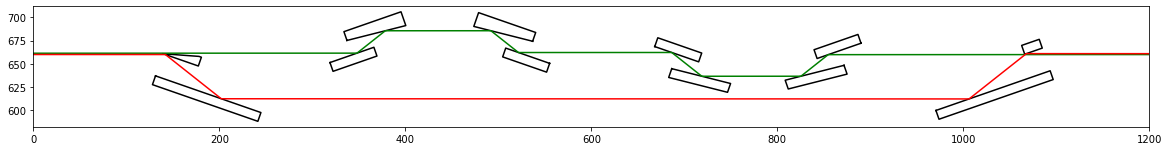

In [8]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

for x in range(8):
    ax.plot([new_crystal[x].boundary[y][2]/1000 for y in [0, 1, 2, 3, 0]],
             [new_crystal[x].boundary[y][1]/1000 for y in [0, 1, 2, 3, 0]],
            'k')
    
for x in range(4):
    ax.plot([new_crystal_lower[x].boundary[y][2]/1000 for y in [0, 1, 2, 3, 0]],
             [new_crystal_lower[x].boundary[y][1]/1000 for y in [0, 1, 2, 3, 0]],
            'k')

ax.plot(new_path_upper[0][:,2]/1000,
        new_path_upper[0][:,1]/1000,'g')

ax.plot(new_path_lower[0][:,2]/1000,
        new_path_lower[0][:,1]/1000,'r')

ax.set_aspect("equal")
ax.set_xlim([0, 1200])

plt.show()

# Get the 2D field

In [9]:
from XRaySimulation.GPU import GPUMultiDevice

In [10]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#                  Get the momentum mesh
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number_x = 2
number_y = 2 ** 9
number_z = 2 ** 13
kx_grid, ky_grid, kz_grid, axis_info = util.get_k_mesh_3d(number_x=number_x,
                                                          number_y=number_y,
                                                          number_z=number_z,
                                                          delta_e_x=1e-50,
                                                          delta_e_y=4e-4,
                                                          delta_e_z=2e-3)
kz_grid += my_pulse.klen0

# Apply fft shift
# kx_grid = np.ascontiguousarray(np.fft.fftshift(kx_grid))
kx_grid = np.zeros(1, np.float64)
number_x = 1
#ky_grid = np.ascontiguousarray(np.fft.fftshift(ky_grid))
#kz_grid = np.ascontiguousarray(np.fft.fftshift(kz_grid))

In [11]:
total_path = 10e6

crystal_list = list(range(10))
crystal_list[0] = grating_list[0]
crystal_list[1:-1] = new_crystal[:]
crystal_list[-1] = grating_list[1]


# -------------------------------------------------------------
#            Get Field for variable branch
# -------------------------------------------------------------
tic = time.time()

(result_3d,
 reflectivty_holder,
 check_var
) = GPUMultiDevice.get_gaussian_source_diffraction(crystal_list = crystal_list,
                                                   total_path = total_path,
                                                   reference_trajectory =  new_path_upper[0], 
                                                   my_pulse = my_pulse,
                                                   grating_orders = [1., -1.],
                                                    kx_grid = kx_grid,
                                                   ky_grid = ky_grid,
                                                   kz_grid = kz_grid,
                                                   number_x = number_x,
                                                   number_y = number_y,
                                                   number_z = number_z,
                                                   d_num=512)

toc = time.time()
print("It takes {:.2f} seconds to get the field for branch 1.".format(toc - tic))

It takes 0.01 seconds to prepare the variables.
It takes 27.62 seconds to get the field for branch 1.


In [12]:
e_field_spec = result_3d['efield_spec_3d'][0][:,:,0]
e_field = np.fft.ifft2(np.fft.fftshift(e_field_spec))

y_proj = np.sum(np.square(np.abs(e_field)), axis = -1)
z_proj = np.sum(np.square(np.abs(e_field)), axis = 0)

y_center = np.argmax(y_proj)
z_center = np.argmax(z_proj)

e_field = np.roll(e_field, (number_y // 2 - y_center, number_z // 2 - z_center), (0,1))

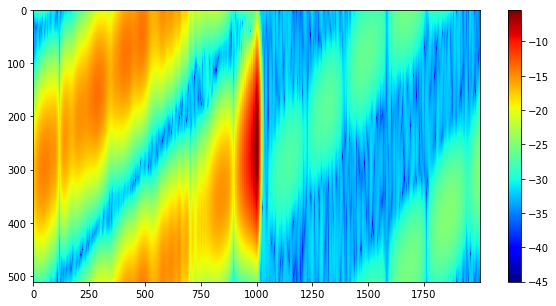

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

im = axes.imshow(np.log(np.square(np.abs(e_field[::,
                                                 number_z // 2 - 1000: number_z // 2+ 1000]))),
                  cmap='jet',aspect="auto")

fig.colorbar(im, ax=axes )
plt.show()

# Create a prism and find the corresponding field

In [14]:
total_path = 10e6

crystal_list = list(range(7))
crystal_list[0] = grating_list[0]
crystal_list[1] = new_crystal_lower[0]
crystal_list[2] = new_crystal_lower[1]

crystal_list[3] = Crystal.Prism(wavevec_delta=np.array([0., 
                                                        np.tan(-5.0e-6) * my_pulse.klen0,
                                                        0.]))
crystal_list[3].surface_point = np.array([0,0,0.6e6])

crystal_list[4] = new_crystal_lower[2]
crystal_list[5] = new_crystal_lower[3]
crystal_list[-1] = grating_list[1]

# -------------------------------------------------------------
#            Get Field for variable branch
# -------------------------------------------------------------0
tic = time.time()

(result_3d_fixed,
 reflectivty_holder,
 check_var
) = GPUMultiDevice.get_gaussian_source_diffraction(crystal_list = crystal_list,
                                                   total_path = total_path,
                                                   reference_trajectory =  new_path_lower[0], 
                                                   my_pulse = my_pulse,
                                                   grating_orders = [-1., 1.],
                                                    kx_grid = kx_grid,
                                                   ky_grid = ky_grid,
                                                   kz_grid = kz_grid,
                                                   number_x = number_x,
                                                   number_y = number_y,
                                                   number_z = number_z,
                                                   d_num=512)

toc = time.time()
print("It takes {:.2f} seconds to get the field for branch 1.".format(toc - tic))

It takes 0.01 seconds to prepare the variables.
It takes 17.57 seconds to get the field for branch 1.


In [15]:
e_field_spec_fix = result_3d_fixed['efield_spec_3d'][0][:,:,0]
e_field_fix = np.fft.ifft2(np.fft.fftshift(e_field_spec_fix))

y_proj_fix = np.sum(np.square(np.abs(e_field_fix)), axis = -1)
z_proj_fix = np.sum(np.square(np.abs(e_field_fix)), axis = 0)

y_center_fix = np.argmax(y_proj_fix)
z_center_fix = np.argmax(z_proj_fix)

e_field_fix = np.roll(e_field_fix, (number_y // 2 - y_center_fix, number_z // 2 - z_center_fix), (0,1))

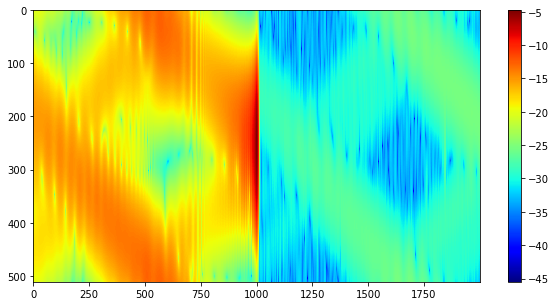

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

im = axes.imshow(np.log(np.square(np.abs(e_field_fix[::,
                                                 number_z // 2 - 1000: number_z // 2 + 1000]))),
                  cmap='jet',aspect="auto")

fig.colorbar(im, ax=axes )
plt.show()

# Get visibility

In [17]:
# Add the two field and get the new field
new_field = (e_field_fix[number_y // 2-100: number_y // 2+100,
                        number_z // 2 - 100: number_z // 2+ 100] +
             e_field[number_y // 2-100: number_y // 2+100,
                        number_z // 2 - 100: number_z // 2+ 100])
new_intensity = np.square(np.abs(new_field))

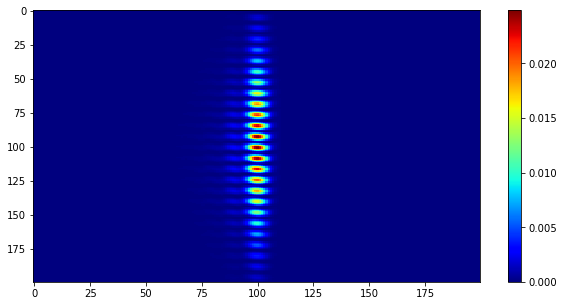

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

im = axes.imshow(new_intensity,cmap='jet',aspect="auto")

fig.colorbar(im, ax=axes )
plt.show()

In [19]:
holder = np.zeros((200, number_y))

spatial_offset = -45
fix_field = np.roll(e_field_fix, spatial_offset, 0)

for x in range(-100, 100):

    tmp = (fix_field[:,
                     number_z//2 - 1000 + x: number_z // 2+ 1000 + x] +
             e_field[:,
                     number_z // 2 - 1000: number_z // 2+ 1000])
    tmp = np.square(np.abs(tmp))
    holder[x] = np.sum(tmp, axis=-1) / np.mean(np.sum(tmp, axis=-1))
    
    
# Get fft
holder_fft = np.fft.ifftshift(np.fft.fft(holder, axis=-1))
holder_fft = np.abs(holder_fft) / holder_fft.shape[1] * 2

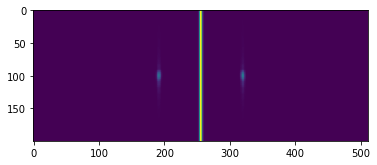

In [20]:
plt.imshow(holder_fft)
plt.show()

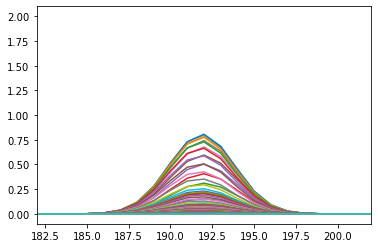

In [21]:
peak_pos = np.argmax(holder_fft.T[:number_y // 2 - 20,100])

plt.plot(holder_fft.T)
plt.xlim([peak_pos - 10, peak_pos + 10])
plt.show()

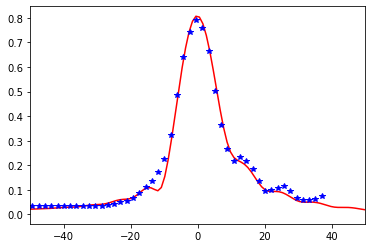

In [22]:
z_res = axis_info['z_time_idx'][1] - axis_info['z_time_idx'][0]
z_axis = np.arange(200) * z_res

exp_peak_pos = time_axis[np.argmax(curve)]
simu_peak_pos = z_axis[np.argmax(holder_fft[:, peak_pos])]

plt.plot(z_axis-simu_peak_pos + -0.5 , holder_fft[:, peak_pos],'r-')
plt.plot(time_axis - exp_peak_pos - 0.5, curve, 'b*')
plt.xlim([-50, 50])
plt.show()

In [23]:
np.save("C:/Users/haoyuan/Desktop/visibility_2021_8_30.npy", holder_fft[:,peak_pos])

In [24]:
y_res = axis_info['y_idx'][1] - axis_info['y_idx'][0]
k_pixel = np.pi * 2 / (y_res * number_y)
k_crossing = k_pixel * (number_y // 2 - peak_pos)

In [25]:
np.arctan(k_crossing / my_pulse.klen0)* 1e6

10.173198707652745